In [1]:
from flightForge import Environment, Motor, Rocket, Simulation, LivePlotter, Parachute

In [ ]:
env = Environment()

motor = Motor("curves/thrust(2).csv", burn_time=4.2, ox_mass=7.33, ox_mdot=1.5, grain_mass=3)

rocket = Rocket(40.8, "curves/MaCd.csv", 0.163)

rocket.add_parachute(Parachute("drogue", 0.7354, 1, "apogee"))
rocket.add_parachute(Parachute("main", 13.8991, 1, 450))

rocket.add_motor(motor)

sim = Simulation(env, rocket, 12, 84, 144, e_log = False)

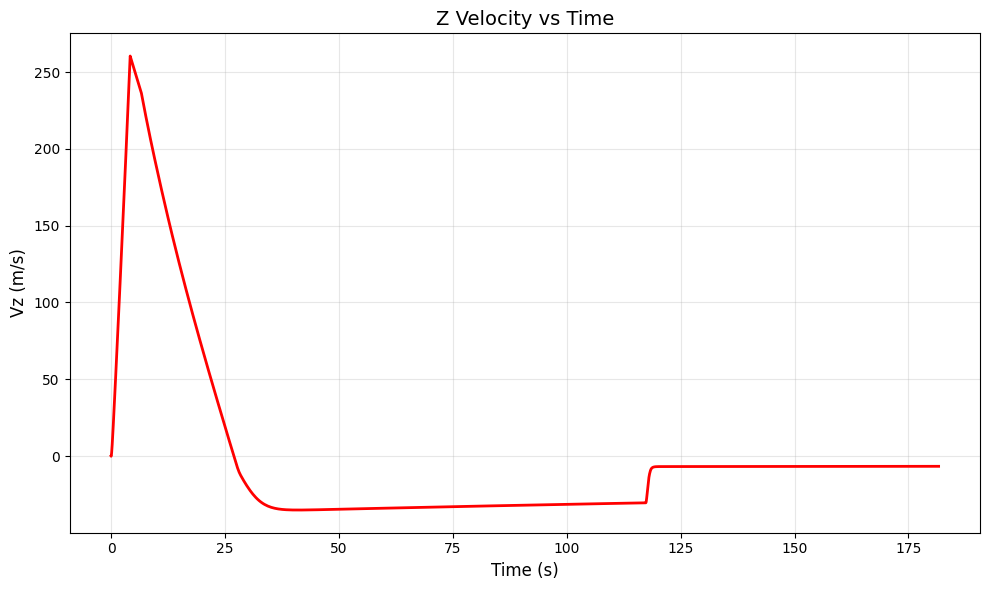

In [5]:
sim.results.vz()